# **Load required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the dataset to the Python environment.**


In [2]:
data = pd.read_csv("/content/Coupen.csv")

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# **Check the basic details of the dataset.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12681 non-null  object
 1   passanger             12679 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12681 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12681 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
data.shape

(12684, 26)

In [6]:
#statistical analysis
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Checking null values
data.isna().sum()

destination                 3
passanger                   5
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  3
gender                      0
age                         0
maritalStatus               3
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 153
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [8]:
##duplicates
data.duplicated().sum()

74

In [9]:
#dropping the duplicated values
data = data.drop_duplicates()
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [10]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

<Axes: xlabel='income'>

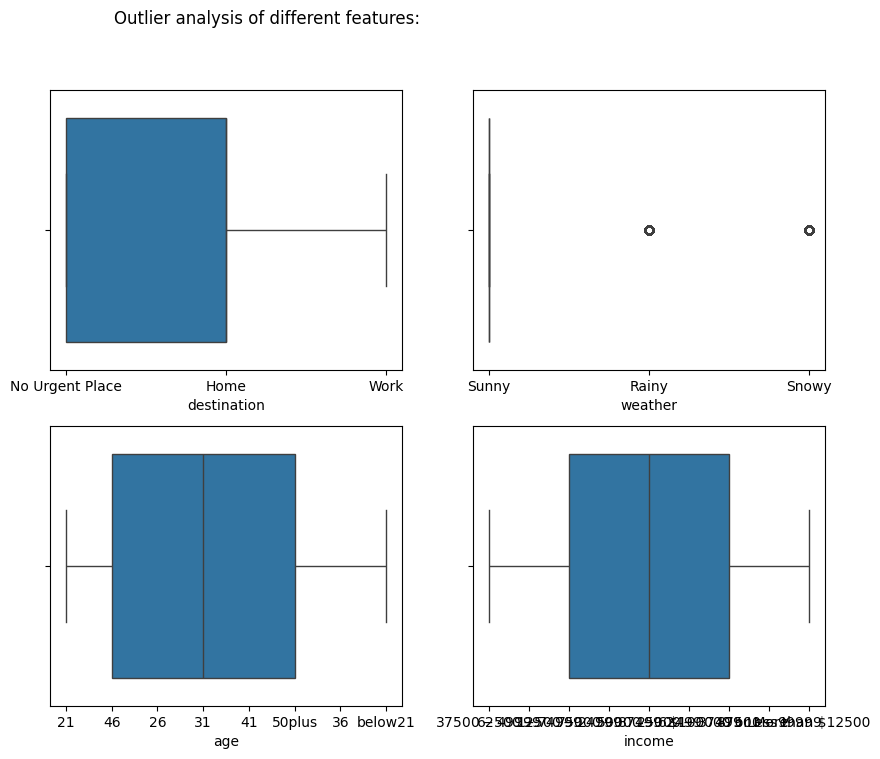

In [11]:
#outlier Analysis

plt.figure(figsize=(10,8))
plt.suptitle("Outlier analysis of different features: ", ha = "right")
plt.subplot(2,2,1)
sns.boxplot(x = data["destination"])

plt.subplot(2,2,2)
sns.boxplot(x = data["weather"])

plt.subplot(2,2,3)
sns.boxplot(x = data["age"])

plt.subplot(2,2,4)
sns.boxplot(x = data["income"])

In [12]:
data[data["Y"]==1].shape

(7157, 26)

In [13]:
print(data["Y"].value_counts())

Y
1    7157
0    5453
Name: count, dtype: int64


In [14]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [15]:
data.isnull().sum()

destination                 3
passanger                   5
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  3
gender                      0
age                         0
maritalStatus               3
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 152
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

# **Fill in all the missing values present in all the columns in the dataset.**

**preprocessing**

In [16]:
#Using imputation method

destination_mode = data['destination'].mode().iloc[0]
paasanger_mode = data['passanger'].mode().iloc[0]
expiration_mode = data['expiration'].mode().iloc[0]
maritalStatus_mode = data['maritalStatus'].mode().iloc[0]
car_mode = data['car'].mode().iloc[0]
Bar_mode = data['Bar'].mode().iloc[0]
CoffeeHouse_mode = data['CoffeeHouse'].mode().iloc[0]
CarryAway_mode = data['CarryAway'].mode().iloc[0]
RestaurantLessThan20_mode = data['RestaurantLessThan20'].mode().iloc[0]
Restaurant20To50_mode = data['Restaurant20To50'].mode().iloc[0]

#filling the null values with imputed values
data['destination'] = data['destination'].fillna(destination_mode)
data['passanger'] = data['passanger'].fillna(paasanger_mode)
data['expiration'] = data['expiration'].fillna(expiration_mode)
data['maritalStatus'] = data['maritalStatus'].fillna(maritalStatus_mode)
data['car'] = data['car'].fillna(car_mode)
data['Bar'] = data['Bar'].fillna(Bar_mode)
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(CoffeeHouse_mode)
data['CarryAway'] = data['CarryAway'].fillna(CarryAway_mode)
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(RestaurantLessThan20_mode)
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(Restaurant20To50_mode)



In [17]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# **EDA**

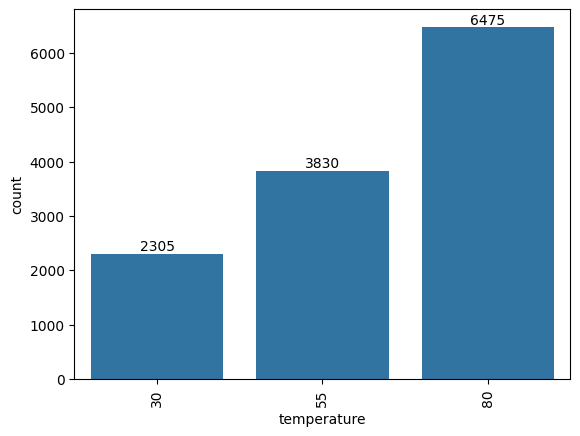

In [18]:

#Univariate analysis
ax = sns.countplot(x = data["temperature"].sort_values())
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)
plt.show()

In [19]:
coupen_selected = data[data["Y"] == 1]
coupen_selected

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


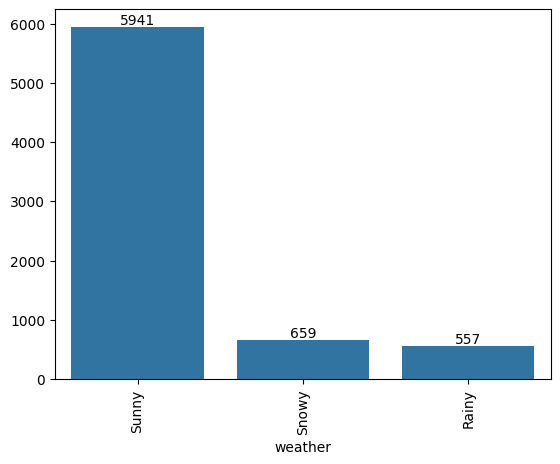

In [20]:
# Coupen selection based on  weather
ax = sns.barplot(y = coupen_selected["weather"].value_counts().values, x = coupen_selected["weather"].value_counts().index)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

In [27]:
#COUPEN SELECTED BASED ON THE FEATURE age

Y = data.groupby("age")["Y"].sum()

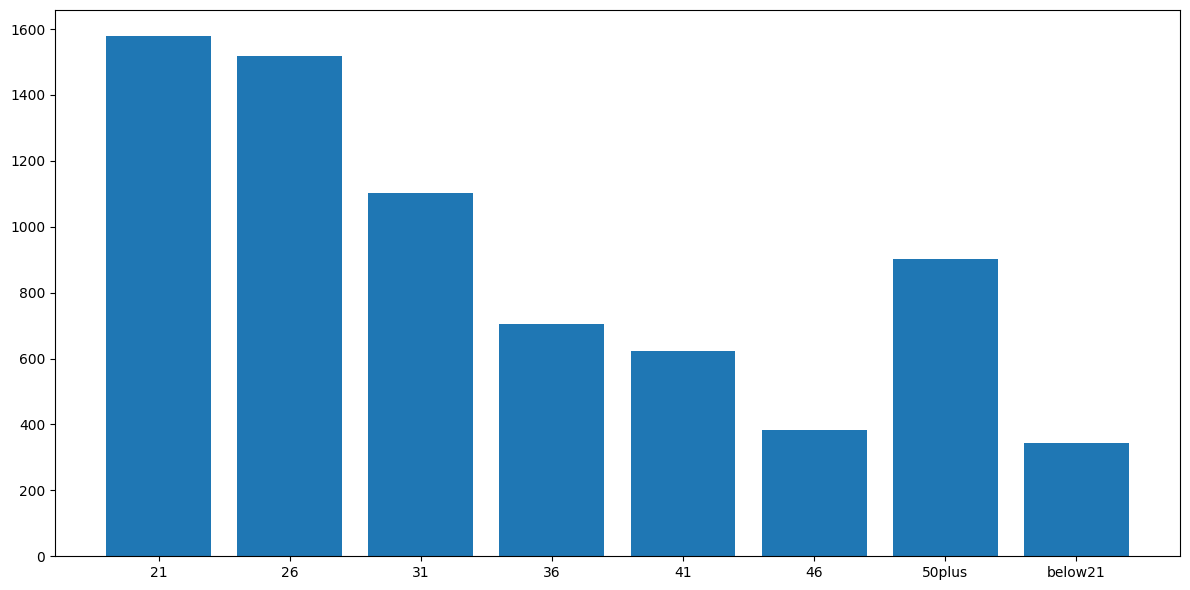

In [28]:
plt.figure(figsize=(12, 6))

plt.bar(Y.index, Y.values)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()

Kruskal-Wallis Test: Statistic = 132.74005680727893, p-value = 1.4992114849441976e-29


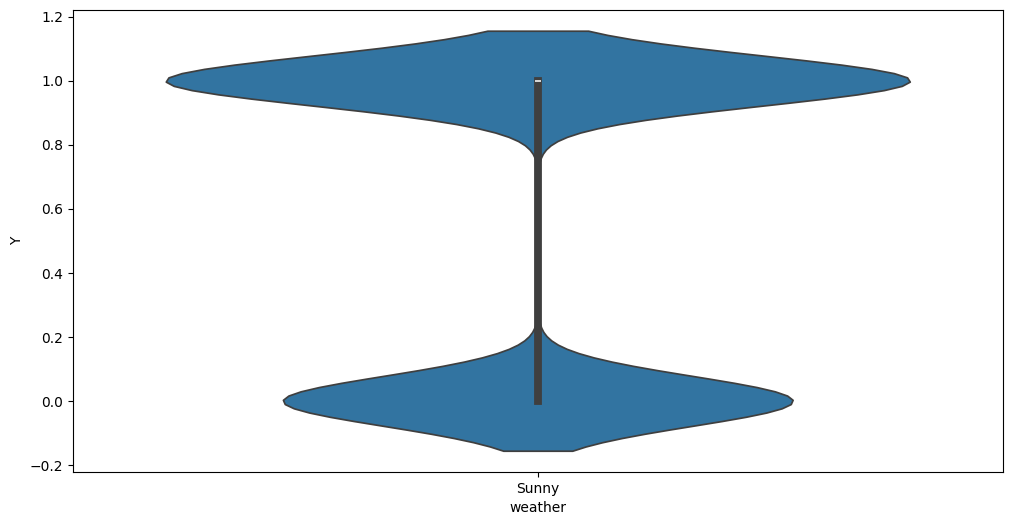

In [31]:
# violin plot for understanding the relation ships btw " weather and Y"


#  A higher value in Kruskal-Wallis Test indicates more significant difference.
#  there are systematic variations in the  coupen selection associated with different weather types.

from scipy.stats import kruskal

weather_sunny = data[data["weather"] == "Sunny"]


plt.figure(figsize=(12,6))
sns.violinplot(data=weather_sunny, y="Y", x = "weather")



# Perform Kruskal-Wallis test
result_by_weather_type = [data['Y'][data['weather'] == weather_type] for weather_type in data['weather'].unique()]
kruskal_stat, p_value = kruskal(*result_by_weather_type)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")

Inference: since p value very much less than test statistic value ,the feature has a significant effect on coupen selection(Y=0 or Y=1)

Kruskal-Wallis Test: Statistic = 24.123866197868395, p-value = 9.033377306626464e-07


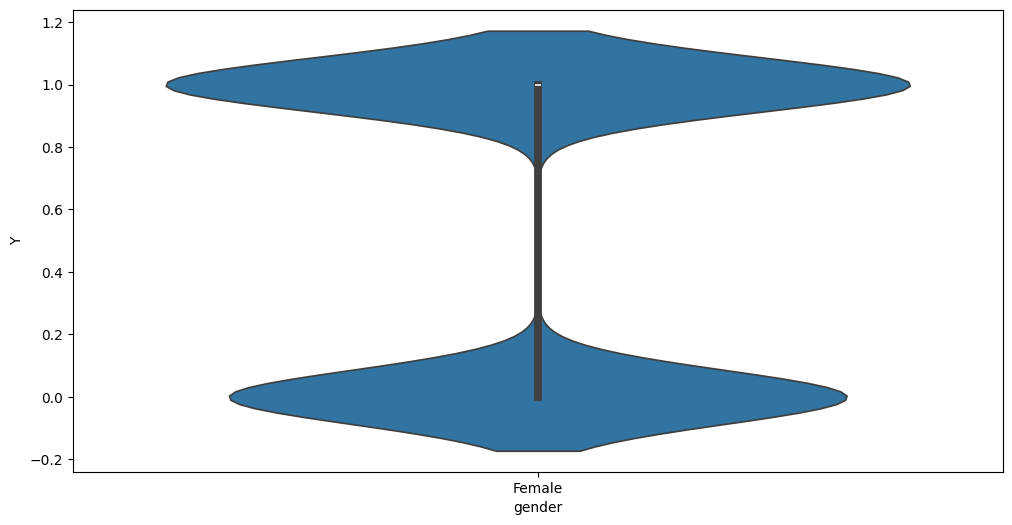

In [32]:
# violin plot for understanding the relation ships btw " gender and Y"


#  A higher value in Kruskal-Wallis Test indicates more significant difference.
#  there are systematic variations in thecoupen selection associated with different gender types.

from scipy.stats import kruskal

gender_female = data[data["gender"] == "Female"]


plt.figure(figsize=(12,6))
sns.violinplot(data=gender_female, y="Y", x = "gender")



# Perform Kruskal-Wallis test
result_by_gender_type = [data['Y'][data['gender'] == gender_type] for gender_type in data['gender'].unique()]
kruskal_stat, p_value = kruskal(*result_by_gender_type)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")

Kruskal-Wallis Test: Statistic = 863.512920389438, p-value = 1.3390456133467735e-185


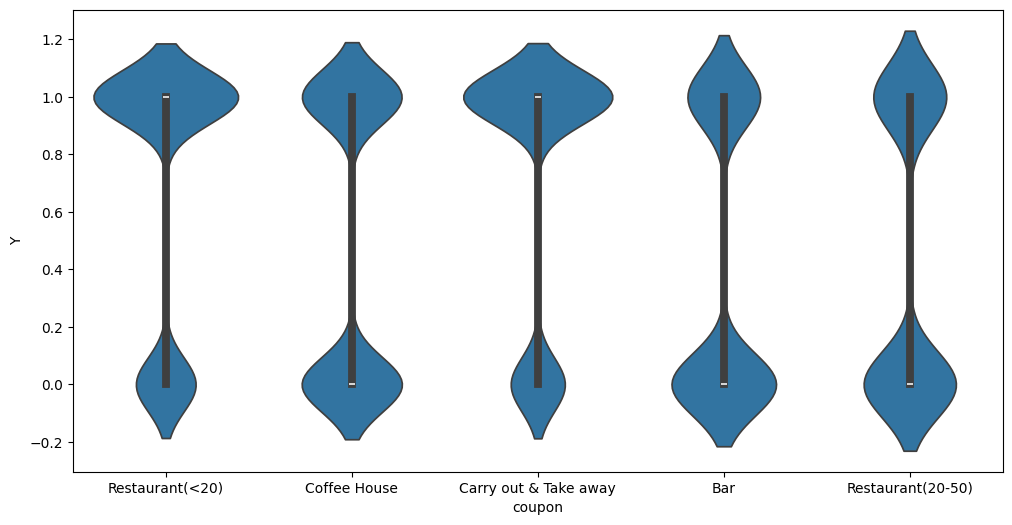

In [34]:
# violin plot for understanding the relation ships btw "coupon and Y"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.
#  there are systematic variations in the coupen selection results "Y" associated with different coupen types.

from scipy.stats import kruskal




plt.figure(figsize=(12,6))
sns.violinplot(data=data, y="Y", x = "coupon")



# Perform Kruskal-Wallis test
result_by_coupon_type = [data['Y'][data['coupon'] == coupon_type] for coupon_type in data['coupon'].unique()]
kruskal_stat, p_value = kruskal(*result_by_coupon_type)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")

Kruskal-Wallis Test: Statistic = 47.433021942258804, p-value = 1.2389030444281295e-09


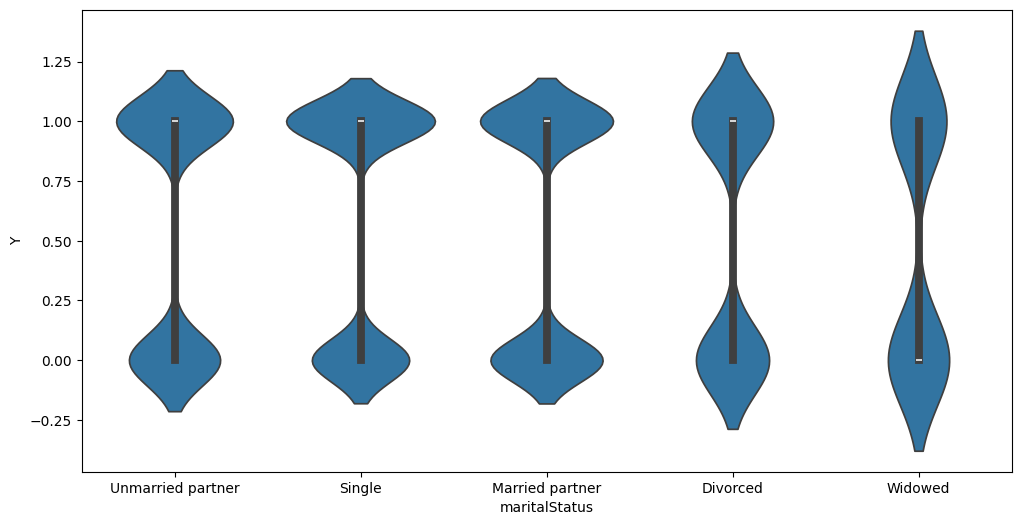

In [154]:
# violin plot for understanding the relation ships btw "maritalStatus and Y"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.
#  there are systematic variations in the coupen selection results "Y" associated with different maritalStatus.

from scipy.stats import kruskal




plt.figure(figsize=(12,6))
sns.violinplot(data=data, y="Y", x = "maritalStatus")



# Perform Kruskal-Wallis test
result_by_maritalStatus_type = [data['Y'][data['maritalStatus'] == maritalStatus_type] for maritalStatus_type in data['maritalStatus'].unique()]
kruskal_stat, p_value = kruskal(*result_by_maritalStatus_type)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")

Kruskal-Wallis Test: Statistic = 219.79115319426495, p-value = 1.8748110229476948e-48


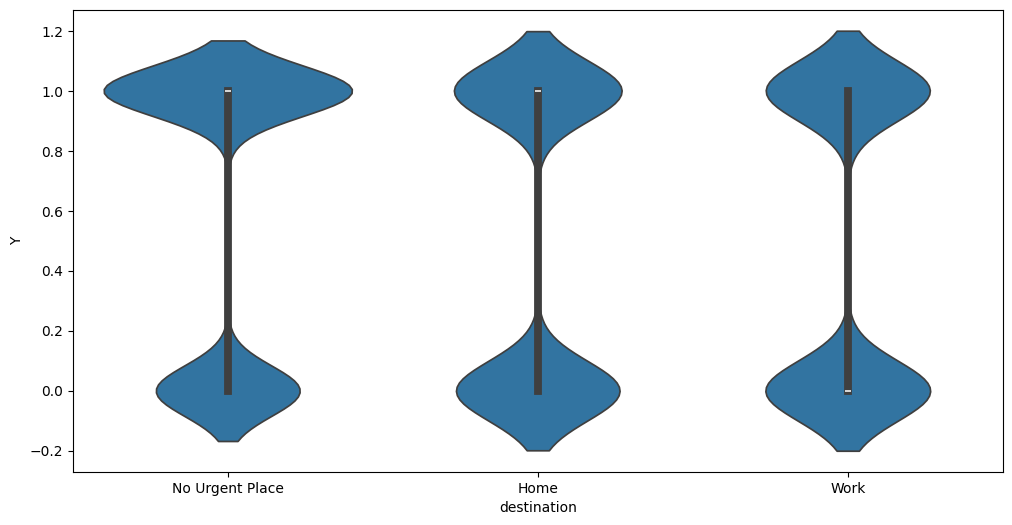

In [151]:
# violin plot for understanding the relation ships btw "destination and Y"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.
#  there are systematic variations in the coupen selection results "Y" associated with different destination types.

from scipy.stats import kruskal




plt.figure(figsize=(12,6))
sns.violinplot(data=data, y="Y", x = "destination")



# Perform Kruskal-Wallis test
result_by_destination_type = [data['Y'][data['destination'] == destination_type] for destination_type in data['destination'].unique()]
kruskal_stat, p_value = kruskal(*result_by_destination_type)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")

Kruskal-Wallis Test: Statistic = 223.4904852863057, p-value = 3.533114234606562e-48


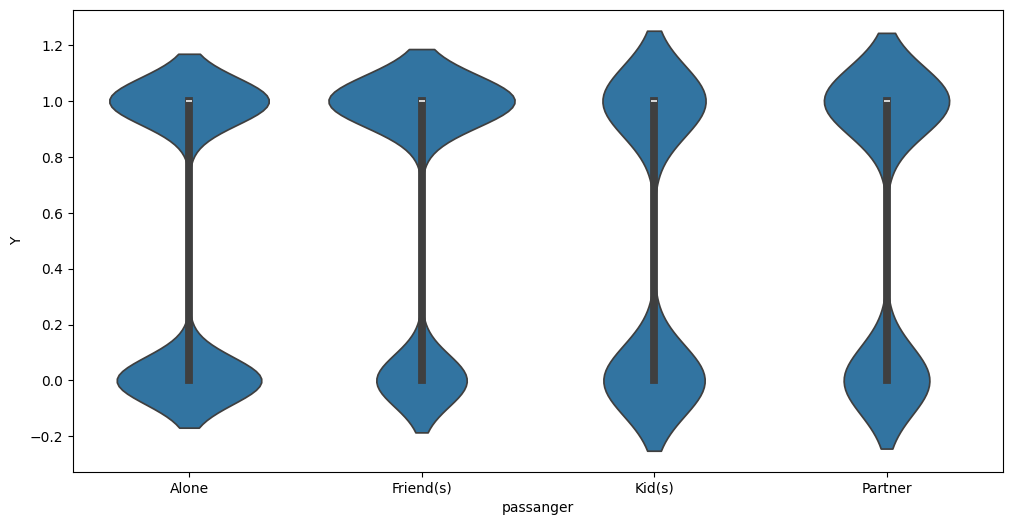

In [153]:
# violin plot for understanding the relation ships btw "passanger and Y"

#  A higher value in Kruskal-Wallis Test indicates more significant difference.
#  there are systematic variations in the coupen selection results "Y" associated with different passanger types.

from scipy.stats import kruskal




plt.figure(figsize=(12,6))
sns.violinplot(data=data, y="Y", x = "passanger")



# Perform Kruskal-Wallis test
result_by_passanger_type = [data['Y'][data['passanger'] == passanger_type] for passanger_type in data['passanger'].unique()]
kruskal_stat, p_value = kruskal(*result_by_passanger_type)

# Print the test result
print(f"Kruskal-Wallis Test: Statistic = {kruskal_stat}, p-value = {p_value}")

In [35]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [36]:
columns = [
    'temperature',
    'has_children',
    'toCoupon_GEQ5min',
    'toCoupon_GEQ15min',
    'toCoupon_GEQ25min',
    'direction_same',
    'direction_opp',
    'Y'
]
data_selected = data[columns]

In [37]:
#Correlation Matrix
corr_matrix = data_selected.corr()
corr_matrix

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
temperature,1.000000,-0.018599,NaN,-0.157089,-0.227165,0.097972,-0.097972,0.059393
has_children,-0.018599,1.000000,NaN,0.079434,-0.010773,-0.032353,0.032353,-0.045056
toCoupon_GEQ5min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
toCoupon_GEQ15min,-0.157089,0.079434,NaN,1.000000,0.321260,-0.302066,0.302066,-0.082693
toCoupon_GEQ25min,-0.227165,-0.010773,NaN,0.321260,1.000000,-0.189900,0.189900,-0.108139
direction_same,0.097972,-0.032353,NaN,-0.302066,-0.189900,1.000000,-1.000000,0.014932
direction_opp,-0.097972,0.032353,NaN,0.302066,0.189900,-1.000000,1.000000,-0.014932
Y,0.059393,-0.045056,NaN,-0.082693,-0.108139,0.014932,-0.014932,1.000000


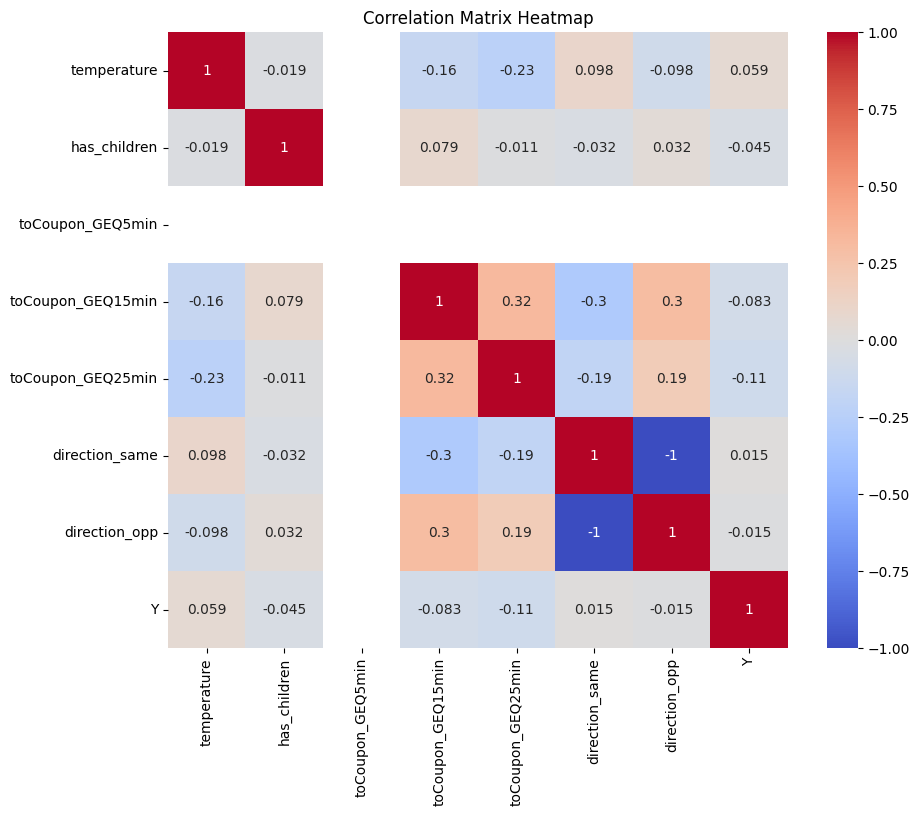

In [38]:
#Heatmap of Correlation Matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Encoding**

Converting categorical features into numerical data


In [81]:
coupen_features = data[["destination","weather","gender","maritalStatus","income","passanger","time","coupon","car","Bar","Y"]]


In [82]:
# label encoding

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [83]:
encode_values = coupen_features.copy()

In [84]:
# will be using for encoding new coupen prediction
prediction_values = encode_values.copy()


# downloading prediction_values as csv file for flask
#prediction_values.to_csv("/content/prediction_values.csv")

In [99]:
encode_values["destination"] = encoder.fit_transform(encode_values["destination"])

encode_values["weather"] = encoder.fit_transform(encode_values["weather"])

encode_values["gender"] = encoder.fit_transform(encode_values["gender"])
encode_values["maritalStatus"] = encoder.fit_transform(encode_values["maritalStatus"])

encode_values["income"] = encoder.fit_transform(encode_values["income"])

encode_values["passanger"] = encoder.fit_transform(encode_values["passanger"])
encode_values["time"] = encoder.fit_transform(encode_values["time"])
encode_values["coupon"] = encoder.fit_transform(encode_values["coupon"])
encode_values["car"] = encoder.fit_transform(encode_values["car"])

encode_values["Bar"] = encoder.fit_transform(encode_values["Bar"])


# **scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range

In [100]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [101]:
x = encode_values.drop(columns="Y")
y = encode_values["Y"]

In [102]:
#y = y.reshape(-1,1)
x1 = x.copy()

x = scaler.fit_transform(x)
#y = scaler.fit_transform(y)

In [103]:

##splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=True)

In [104]:
encode_values.head()

,destination,weather,gender,maritalStatus,income,passanger,time,coupon,car,Bar,Y
0,1,2,0,3,3,0,2,4,1,4,1
1,1,2,0,3,3,1,0,2,1,4,0
2,1,2,0,3,3,1,0,1,1,4,1
3,1,2,0,3,3,1,2,2,1,4,0
4,1,2,0,3,3,1,2,2,1,4,0


# **Modelling**

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
rf_predict = rf_model.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(rf_predict,y_test))
print("\n Claasification report: \n", classification_report(rf_predict,y_test))

Accuracy:  0.6467089611419509

 Claasification report: 
               precision    recall  f1-score   support

           0       0.58      0.58      0.58      1069
           1       0.69      0.70      0.70      1453

    accuracy                           0.65      2522
   macro avg       0.64      0.64      0.64      2522
weighted avg       0.65      0.65      0.65      2522



In [106]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
gbc.fit(x_train,y_train)
gbc_predict = gbc.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(gbc_predict,y_test))
print("\n Claaification report: \n", classification_report(gbc_predict,y_test))

Accuracy:  0.6812053925455988

 Claaification report: 
               precision    recall  f1-score   support

           0       0.60      0.62      0.61      1014
           1       0.74      0.72      0.73      1508

    accuracy                           0.68      2522
   macro avg       0.67      0.67      0.67      2522
weighted avg       0.68      0.68      0.68      2522



In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)
knn_model_predict = knn_model.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(knn_model_predict,y_test))
print("\n Claaification report: \n", classification_report(knn_model_predict,y_test))

Accuracy:  0.6371927042030134

 Claaification report: 
               precision    recall  f1-score   support

           0       0.54      0.57      0.56      1007
           1       0.70      0.68      0.69      1515

    accuracy                           0.64      2522
   macro avg       0.62      0.63      0.62      2522
weighted avg       0.64      0.64      0.64      2522



In [108]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)
svc_model_predict = svc_model.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(svc_model_predict,y_test))
print("\n Claaification report: \n", classification_report(svc_model_predict,y_test))

Accuracy:  0.6304520222045995

 Claaification report: 
               precision    recall  f1-score   support

           0       0.47      0.57      0.52       874
           1       0.74      0.66      0.70      1648

    accuracy                           0.63      2522
   macro avg       0.61      0.62      0.61      2522
weighted avg       0.65      0.63      0.64      2522



In [109]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train,y_train)
clf_predict = clf.predict(x_test)
# evaluation

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy: ",  accuracy_score(clf_predict,y_test))
print("\n Claaification report: \n", classification_report(clf_predict,y_test))

Accuracy:  0.6292624900872323

 Claaification report: 
               precision    recall  f1-score   support

           0       0.62      0.55      0.58      1189
           1       0.64      0.70      0.67      1333

    accuracy                           0.63      2522
   macro avg       0.63      0.62      0.62      2522
weighted avg       0.63      0.63      0.63      2522



# **Cross validation**

In [110]:
from sklearn.model_selection import KFold,cross_val_score

kf = KFold(n_splits=5)

rf_score = cross_val_score(rf_model,x,y,cv=kf)
gbc_score = cross_val_score(gbc,x,y,cv=kf)
knn_model_score = cross_val_score(knn_model,x,y,cv=kf)
clf_score = cross_val_score(clf,x,y,cv=kf)
svc_model_score = cross_val_score(svc_model,x,y,cv=kf)

mean_rf_scr = rf_score.mean()
mean_gbc_scr = gbc_score.mean()
mean_knn_scr = knn_model_score.mean()
mean_clf_scr = clf_score.mean()
mean_svc_model_scr = svc_model_score.mean()

print('Random forest classifier Cross Validation Score :',mean_rf_scr)
print('Gradient boost classifier Cross Validation Score :',mean_gbc_scr)
print('KNN Cross Validation Score :',mean_knn_scr)
print('Decision tree classifier Cross Validation Score :',mean_clf_scr)
print('Support vector classifier Cross Validation Score :',mean_svc_model_scr)

Random forest classifier Cross Validation Score : 0.613877874702617
Gradient boost classifier Cross Validation Score : 0.6563838223632038
KNN Cross Validation Score : 0.5964314036478986
Decision tree classifier Cross Validation Score : 0.5854084060269628
Support vector classifier Cross Validation Score : 0.6060269627279937


Inference : From the accuracy scores of different classification models,its clear that Gradient Boost Clsassifier have better performance when compared to other alogorithms.

In [97]:
data.loc[37]

destination                                   Home
passanger                                    Alone
weather                                      Sunny
temperature                                     80
time                                           6PM
coupon                                Coffee House
expiration                                      2h
gender                                        Male
age                                             21
maritalStatus                               Single
has_children                                     0
education                         Bachelors degree
occupation              Architecture & Engineering
income                             $62500 - $74999
car                                         Mazda5
Bar                                          never
CoffeeHouse                                  less1
CarryAway                                      4~8
RestaurantLessThan20                           4~8
Restaurant20To50               

In [111]:
# prediction  1


coupen_prediction = {
    "destination": "Home",
    "weather": "Sunny",
    "gender": "Male",
    "maritalStatus": "Single",
    "income": "$62500 - $74999",
    "passanger": "Alone",
    "time":"6PM",
    "coupon":"Coffee House",
    "car":"Mazda5",
    "Bar":"never"

}


coupen_predictdf = pd.DataFrame([coupen_prediction])


encoder.fit_transform(prediction_values["destination"])
coupen_predictdf['destination'] = encoder.transform(coupen_predictdf['destination'])


encoder.fit_transform(prediction_values["weather"])
coupen_predictdf['weather'] = encoder.transform(coupen_predictdf['weather'])

encoder.fit_transform(prediction_values["gender"])
coupen_predictdf['gender'] = encoder.transform(coupen_predictdf['gender'])

encoder.fit_transform(prediction_values["maritalStatus"])
coupen_predictdf['maritalStatus'] = encoder.transform(coupen_predictdf['maritalStatus'])


encoder.fit_transform(prediction_values["income"])
coupen_predictdf['income'] = encoder.transform(coupen_predictdf['income'])

encoder.fit_transform(prediction_values["passanger"])
coupen_predictdf['passanger'] = encoder.transform(coupen_predictdf['passanger'])

encoder.fit_transform(prediction_values["time"])
coupen_predictdf['time'] = encoder.transform(coupen_predictdf['time'])

encoder.fit_transform(prediction_values["coupon"])
coupen_predictdf['coupon'] = encoder.transform(coupen_predictdf['coupon'])

encoder.fit_transform(prediction_values["car"])
coupen_predictdf['car'] = encoder.transform(coupen_predictdf['car'])

encoder.fit_transform(prediction_values["Bar"])
coupen_predictdf['Bar'] = encoder.transform(coupen_predictdf['Bar'])





scaler.fit_transform(x1)
coupen_predict_scaled = scaler.transform(coupen_predictdf)

In [112]:
#original scaled data
x[37]

array([-1.39700837,  0.47587864,  1.02635837,  0.34703992,  0.69109761,
       -0.71542288,  0.53495969, -0.04008897, -0.05392097,  0.87881349])

In [113]:
# scaled data for new coupen prediction
coupen_predict_scaled

array([[-1.39700837,  0.47587864,  1.02635837,  0.34703992,  0.69109761,
        -0.71542288,  0.53495969, -0.04008897, -0.05392097,  0.87881349]])

In [114]:
prediction = gbc.predict(coupen_predict_scaled)

# Print the prediction
print("Predicted Result:", prediction[0])

Predicted Result: 0


In [117]:

coupen_predictdf

,destination,weather,gender,maritalStatus,income,passanger,time,coupon,car,Bar
0,0,2,1,2,5,0,3,2,1,4


In [118]:
encode_values.loc[2361]

destination      1
weather          2
gender           0
maritalStatus    2
income           2
passanger        1
time             0
coupon           1
car              1
Bar              1
Y                0
Name: 2361, dtype: int64

In [119]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [128]:
data["Bar"].value_counts()


Bar
never    5285
less1    3438
1~3      2468
4~8      1071
gt8       348
Name: count, dtype: int64

In [135]:
# prediction 2

new_data = {
   "destination": "No Urgent Place",
    "weather": "Snowy",
    "gender": "Female",
    "maritalStatus": "Single",
    "income": "$37500 - $49999",
   "passanger": "Partner",
    "time": "10AM",
   "coupon":"Restaurant(<20)",
   "car":"do not drive",
   "Bar":"less1"
}

# Convert input data to DataFrame
new_data_df = pd.DataFrame([new_data])


In [147]:
encoder.fit_transform(coupen_features["destination"])
new_data_df['destination'] = encoder.transform(new_data_df["destination"])

In [136]:
encoder.fit_transform(coupen_features["weather"])
new_data_df['weather'] = encoder.transform(new_data_df["weather"])

In [137]:
encoder.fit_transform(coupen_features["gender"])
new_data_df['gender'] = encoder.transform(new_data_df["gender"])

In [138]:
encoder.fit_transform(coupen_features["maritalStatus"])
new_data_df['maritalStatus'] = encoder.transform(new_data_df["maritalStatus"])

In [139]:
encoder.fit_transform(coupen_features["income"])
new_data_df['income'] = encoder.transform(new_data_df["income"])

In [140]:
encoder.fit_transform(coupen_features["passanger"])
new_data_df['passanger'] = encoder.transform(new_data_df["passanger"])

In [142]:
encoder.fit_transform(coupen_features["time"])
new_data_df['time'] = encoder.transform(new_data_df["time"])

In [143]:
encoder.fit_transform(coupen_features["coupon"])
new_data_df['coupon'] = encoder.transform(new_data_df["coupon"])

In [144]:
encoder.fit_transform(coupen_features["car"])
new_data_df['car'] = encoder.transform(new_data_df["car"])

In [145]:
encoder.fit_transform(coupen_features["Bar"])
new_data_df['Bar'] = encoder.transform(new_data_df["Bar"])

In [148]:
# Scale numerical features
new_data_scaled = scaler.transform(new_data_df)  # Assuming 'scaler' is the trained StandardScaler

# Make predictions
new_data_result = gbc.predict(new_data_scaled)

# Print the prediction
print("Predicted new coupen prediction:", new_data_result)

Predicted new coupen prediction: [0]


Inference: driver will not accept coupon (Y=0)

In [149]:
# pickle

import pickle

pickle.dump(gbc,open('gbc_newmodel.pkl','wb'))

In [150]:
pickled_model = pickle.load(open('gbc_newmodel.pkl','rb'))

pickled_model.predict(new_data_scaled)

array([0])